## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [27]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

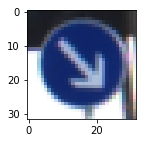

38


In [28]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

index = 15706 # random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
plt.show()
print(y_train[index])
is_features_normal = False

## Convert to Grayscale

In [29]:
from scipy import ndimage
import cv2

# Rotation
def rotate(img):
    rows,cols,_ = img.shape
    axis_offset = random.uniform(-2,2)
    angle = random.uniform(-10,10)
    scale = random.uniform(0.95,1.05)
    M = cv2.getRotationMatrix2D((cols/2 + axis_offset,rows/2 + axis_offset),angle,scale)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return np.reshape(dst,(32,32,1))

def affine_transform(img):
    rows,cols,_ = img.shape
    off = 4
    
    x_pt1 = np.array([cols/2, cols/4, 3*cols/4])
    y_pt1 = np.array([rows/4, 3*rows/4, 3*rows/4])
    x_offset = (np.random.rand(3) - 0.5) * off
    y_offset = (np.random.rand(3) - 0.5) * off
    x_pt2 = x_pt1 + x_offset
    y_pt2 = y_pt1 + y_offset

    pt1 = list(map(list, zip(*np.vstack((x_pt1, y_pt1)))))
    pt2 = list(map(list, zip(*np.vstack((x_pt2, y_pt2)))))
    pts1 = np.float32(pt1)
    pts2 = np.float32(pt2)

    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return np.reshape(dst,(32,32,1))

def perspect(img):
    rows,cols,_ = img.shape
    off = 4
    
    x_pt1 = np.array([0, cols, 0, cols])
    y_pt1 = np.array([0, 0, rows, rows])
    x_offset = (np.random.rand(4) - 0.5) * off
    y_offset = (np.random.rand(4) - 0.5) * off
    x_pt2 = x_pt1 + x_offset
    y_pt2 = y_pt1 + y_offset

    pt1 = list(map(list, zip(*np.vstack((x_pt1, y_pt1)))))
    pt2 = list(map(list, zip(*np.vstack((x_pt2, y_pt2)))))
    pts1 = np.float32(pt1)
    pts2 = np.float32(pt2)

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(32,32))
    return np.reshape(dst,(32,32,1))
    
def gaus_blur(img):
    kernel = np.ones((2,2),np.float32)/4
    dst = cv2.filter2D(img,-1,kernel)
    return np.reshape(dst,(32,32,1))

def eq_hist(img):
    img = np.reshape(img,(32,32)).astype('uint8')
    dst = cv2.equalizeHist(img)
    return np.reshape(dst,(32,32,1)).astype('float')
    
# def rotate(image):
#     angle = random.randint(-30, 30)
#     return ndimage.rotate(image, angle, reshape=False)

# # Flip
# def flip(image):
#     ax = random.randint(0, 1)
#     return np.flip(image, ax)

# # Crop
# def crop(image):
#     c = random.randint(1,3)
#     crop_image = image[c:-c,c:-c,]
#     return np.pad(crop_image, ((c,c),(c,c),(0,0)), 'constant')

# Noise
# def add_noise(image):
#     noise = np.random.rand(32,32,1)
#     return image + noise


def normalize(image_data):
    return (image_data - 128)/ 128
#     return (0.1 + ((image_data-0)*(0.9-0.1)/(255-0)))

In [30]:
X_train_gray = np.mean(X_train, axis=3, keepdims=True)
X_test_gray = np.mean(X_test, axis=3, keepdims=True)
X_validation_gray = np.mean(X_validation, axis=3, keepdims=True)

(32, 32)


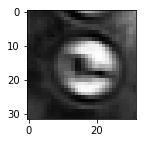

10
<class 'numpy.ndarray'>
(32, 32, 1)


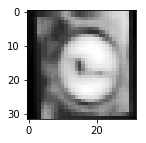

In [31]:
index = random.randint(0, len(X_train_gray))
image = X_train_gray[index].squeeze()
print(image.shape)
plt.figure(figsize=(2,2))
plt.imshow(image, cmap="gray")
plt.show()
print(y_train[index])

image1 = eq_hist(gaus_blur(affine_transform(perspect(X_train_gray[index]))))
print(type(image))
print(image1.shape)
plt.figure(figsize=(2,2))
plt.imshow(image1.squeeze(), cmap="gray")
plt.show()

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

809.279069767


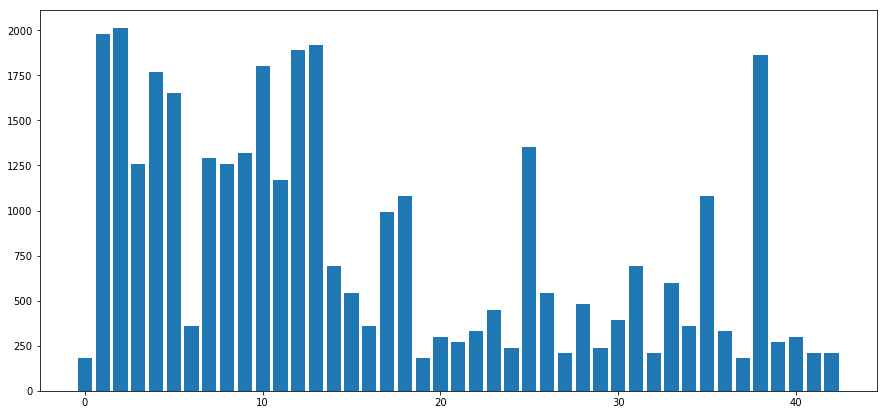

In [32]:
def plot_bar(data):
    count_sample = []
    for i in range(43):
        count_sample.append(sum(data == i))
    plt.figure(figsize=(15,7))
    plt.bar(np.arange(43), np.array(count_sample))
    return count_sample
                   
count = plot_bar(y_train)
mean = np.mean(count)
print(mean)
labels_below_mean = np.arange(43)[np.array(count) < np.mean(count)]

(16649, 32, 32, 1)


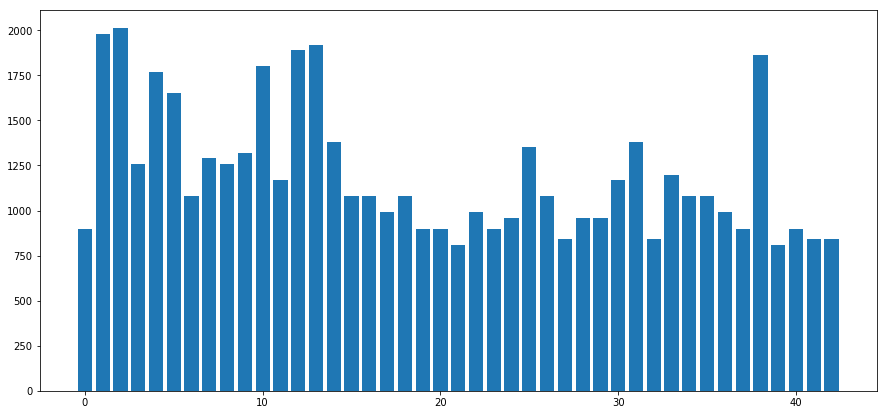

In [33]:
X_augmented = []
y_augmented = []
for l in labels_below_mean:
    X_to_augment = X_train_gray[y_train == l]
    repeat = int(mean / X_to_augment.shape[0])
    for r in range(repeat):
        for im in range(X_to_augment.shape[0]):
            X_augmented.append(eq_hist(gaus_blur(affine_transform(perspect(X_to_augment[im])))))
#             X_augmented.append(random_translate(random_scaling(random_warp(random_brightness(X_to_augment[im])))))
            y_augmented.append(l)
#     print("Label: {} Data: {} Repeat: {}".format(l, len(X_augmented), repeat))
print(np.array(X_augmented).shape)
X_train_augmented = np.concatenate((X_train_gray, np.array(X_augmented)), axis=0)
y_train_augmented = np.concatenate((y_train, np.array(y_augmented)), axis=0)
p = plot_bar(y_train_augmented)

In [34]:
if not is_features_normal:
    X_train_augmented = normalize(X_train_augmented)
    X_validation_gray = normalize(X_validation_gray)
    X_test_gray = normalize(X_test_gray)    
    is_features_normal = True

In [35]:
# X_train_rotate = np.zeros(X_train_gray.shape)
# X_train_flip = np.zeros(X_train_gray.shape)
# X_train_crop = np.zeros(X_train_gray.shape)
# X_train_noise = np.zeros(X_train_gray.shape)

# for i in range(X_train_gray[0]):
    
#     X_train_rotate[i] = rotate(X_train_gray[i])
#     X_train_flip[i] = flip(X_train_gray[i])
#     X_train_crop[i] = crop(X_train_gray[i])
#     X_train_noise[i] = add_noise(X_train_gray[i])

# X_train_augmented = np.concatenate((X_train_gray, X_train_rotate, X_train_flip, 
#                                     X_train_crop, X_train_noise), axis=0)
# y_train_augmented = np.concatenate((y_train, y_train, y_train, y_train, y_train), axis=0)
# print(X_train_augmented.shape)
# print(y_train_augmented.shape)

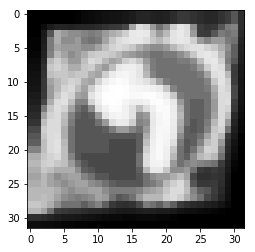

34


In [36]:
index = random.randint(0, X_train_augmented.shape[0])
image = X_train_augmented[index].squeeze()

# plt.figure(figsize=(2,2))
plt.imshow(image, cmap='gray')
plt.show()
print(y_train_augmented[index])

In [37]:
print(index)

47530


In [38]:
from sklearn.utils import shuffle

X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)

print(X_train_augmented.shape)

(51448, 32, 32, 1)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [39]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 100

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [40]:
from tensorflow.contrib.layers import flatten

l1 = 0

def LeNet(x):   
    global l1
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    n_classes = 43
    keep_prob = 0.5
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape=[4,4,1,32],mean=mu,stddev=sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape=[4,4,32,128],mean=mu,stddev=sigma)),
        'wc21': tf.Variable(tf.truncated_normal(shape=[4,4,128,256],mean=mu,stddev=sigma)),
        'wc3': tf.Variable(tf.truncated_normal(shape=[5*5*128,1024],mean=mu,stddev=sigma)),
        'wc4': tf.Variable(tf.truncated_normal(shape=[1024,2048],mean=mu,stddev=sigma)),
        'wc5': tf.Variable(tf.truncated_normal(shape=[2048,n_classes],mean=mu,stddev=sigma))
    }
    
    biases = {
        'bc1': tf.Variable(tf.zeros(32)),
        'bc2': tf.Variable(tf.zeros(128)),
        'bc21': tf.Variable(tf.zeros(256)),
        'bc3': tf.Variable(tf.zeros(1024)),
        'bc4': tf.Variable(tf.zeros(2048)),
        'bc5': tf.Variable(tf.zeros(n_classes))
    }
    
    pad = 'VALID'
    pad_pool = 'VALID'
    stride = [1,1,1,1]
    k_s = [1,2,2,1]
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    l1 = tf.nn.conv2d(x,weights['wc1'],strides=stride,padding=pad)
    l1 = tf.nn.bias_add(l1,biases['bc1'])
    l1 = tf.nn.relu(l1)
#     l1 = tf.nn.dropout(l1, keep_prob=keep_prob)
    l1 = tf.nn.max_pool(l1,ksize=k_s,strides=k_s,padding=pad_pool)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2 = tf.nn.conv2d(l1,weights['wc2'],strides=stride,padding=pad)
    l2 = tf.nn.bias_add(l2,biases['bc2'])
    l2 = tf.nn.relu(l2)
#     l2 = tf.nn.dropout(l2, keep_prob=keep_prob)
    l2 = tf.nn.max_pool(l2,ksize=k_s,strides=k_s,padding=pad_pool)
    
#     l21 = tf.nn.conv2d(l2,weights['wc21'],strides=stride,padding=pad)
#     l21 = tf.nn.bias_add(l21,biases['bc21'])
#     l21 = tf.nn.relu(l21)
# #     l21 = tf.nn.dropout(l21, keep_prob=keep_prob)
#     l21 = tf.nn.max_pool(l21,ksize=k_s,strides=k_s,padding=pad_pool)
    
    l2 = tf.contrib.layers.flatten(l2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    l3 = tf.add(tf.matmul(l2,weights['wc3']),biases['bc3'])
    l3 = tf.nn.relu(l3)
#     l3 = tf.nn.dropout(l3, keep_prob=keep_prob)
    
    
    # TODO: Activation.

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    l4 = tf.add(tf.matmul(l3,weights['wc4']),biases['bc4'])
    l4 = tf.nn.relu(l4)
    l4 = tf.nn.dropout(l4, keep_prob=keep_prob)
    
    
    # TODO: Activation.

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(l4,weights['wc5']),biases['bc5'])

    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [41]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [42]:
rate = 0.0008
# global_step = tf.Variable(0, trainable=False)
# starter_learning_rate = 0.01
# learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
#                                            100000, 0.96, staircase=True)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [43]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [44]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_augmented)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_augmented[offset:end], y_train_augmented[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_validation_gray, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.882

EPOCH 2 ...
Validation Accuracy = 0.919

EPOCH 3 ...
Validation Accuracy = 0.937

EPOCH 4 ...
Validation Accuracy = 0.940

EPOCH 5 ...
Validation Accuracy = 0.944

EPOCH 6 ...
Validation Accuracy = 0.936

EPOCH 7 ...
Validation Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.950

EPOCH 10 ...
Validation Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.948

EPOCH 12 ...
Validation Accuracy = 0.959

EPOCH 13 ...
Validation Accuracy = 0.960

EPOCH 14 ...
Validation Accuracy = 0.965

EPOCH 15 ...
Validation Accuracy = 0.963

EPOCH 16 ...
Validation Accuracy = 0.966

EPOCH 17 ...
Validation Accuracy = 0.934

EPOCH 18 ...
Validation Accuracy = 0.950

EPOCH 19 ...
Validation Accuracy = 0.965

EPOCH 20 ...
Validation Accuracy = 0.959

EPOCH 21 ...
Validation Accuracy = 0.957

EPOCH 22 ...
Validation Accuracy = 0.950

EPOCH 23 ...
Validation Accuracy = 0.967

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [45]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.945


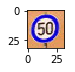

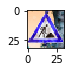

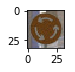

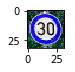

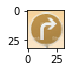

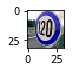

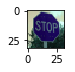

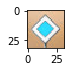

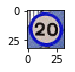

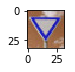

In [46]:
from glob import glob

my_test_images = []

for fn in glob('./mytest/*.jpg'):
    im = cv2.imread(fn)
#     plt.figure(figsize=(2,2))
#     plt.imshow(im.squeeze())
#     plt.show()
    my_test_images.append(im)

my_images = np.array((my_test_images))
my_labels = np.array([2,25,40,1,33,8,14,12,0,13])
my_test_gray = np.mean(my_images, axis=3, keepdims=True)
my_test_norm = normalize(my_test_gray)

for i in range(my_images.shape[0]):
    plt.subplot(5,5,i+1)
    plt.imshow(my_images[i])
    plt.show()

In [47]:
scores = tf.nn.softmax(logits)
top_scores = tf.nn.top_k(scores, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_test_norm, my_labels)
    all_scores = sess.run(scores, feed_dict={x: my_test_norm})
    top_five = sess.run(top_scores, feed_dict={x: my_test_norm})

print(my_accuracy)

INFO:tensorflow:Restoring parameters from ./lenet
0.899999976158


In [48]:
print(top_five.indices)
print(top_five.values)
[2,25,40,1,33,8,14,12,0,13]

[[ 2  3  8  5  9]
 [25 30 22 34 11]
 [40 12 34 14 15]
 [ 1  5  2 38  0]
 [33 36 39 35 11]
 [ 5  3  8  0 18]
 [14  3  5 34  8]
 [12  0  1  2  3]
 [ 0  3 37 29 31]
 [13 38  8  0  1]]
[[  1.00000000e+00   1.12345876e-17   3.57903724e-21   9.56360057e-24
    1.14832993e-24]
 [  9.98844266e-01   1.15571136e-03   4.67992838e-19   1.75693748e-21
    5.62380265e-23]
 [  1.00000000e+00   7.68150192e-14   5.95180786e-23   1.78895273e-23
    7.74525330e-24]
 [  1.00000000e+00   5.54267744e-32   1.05116792e-34   8.97719149e-37
    3.50890023e-37]
 [  1.00000000e+00   3.12265890e-27   2.62252869e-28   5.87074379e-30
    4.61998338e-31]
 [  9.59234595e-01   4.03516330e-02   2.10987608e-04   2.02722615e-04
    7.97081583e-08]
 [  1.00000000e+00   7.75779788e-11   3.10638945e-11   5.48389806e-12
    4.22044691e-12]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   7.53907425e-23   1.88806927e-31   3.86311231e-33
    1.81226102e-35]
 [  1.000

[2, 25, 40, 1, 33, 8, 14, 12, 0, 13]

In [49]:
import csv

signs = []

with open('signnames.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if row[0] not in 'ClassId':
            signs.append(row[1])

signs = np.array(signs)

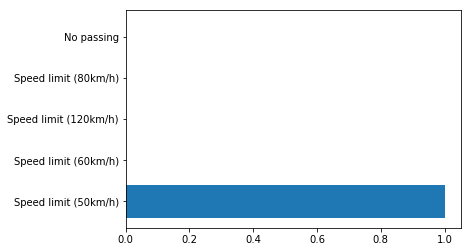

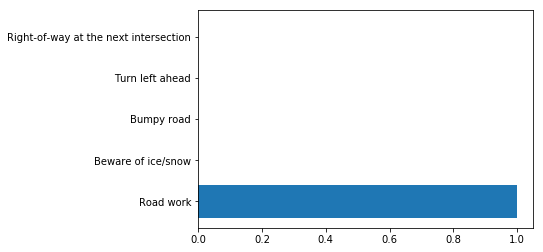

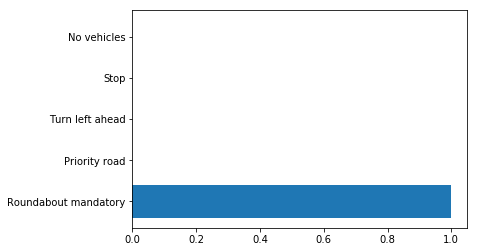

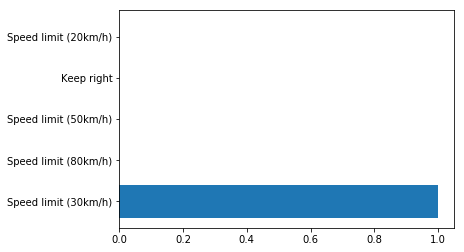

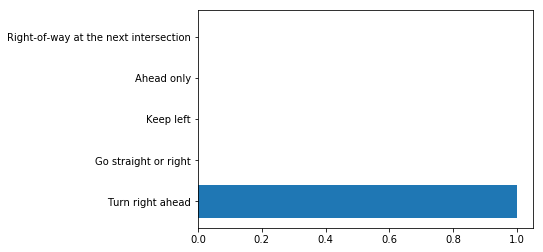

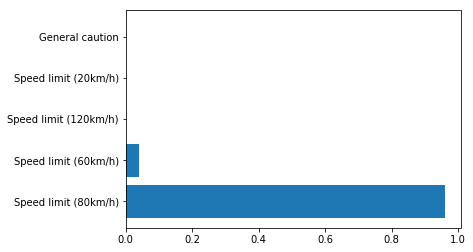

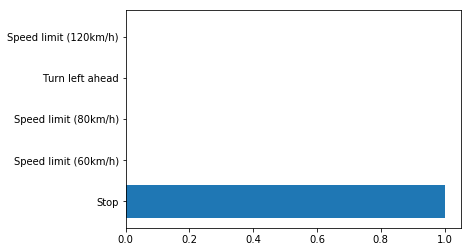

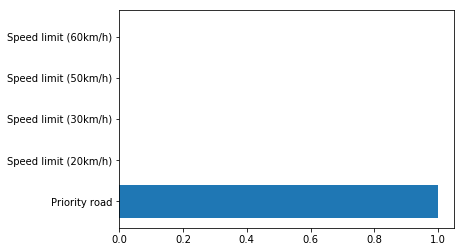

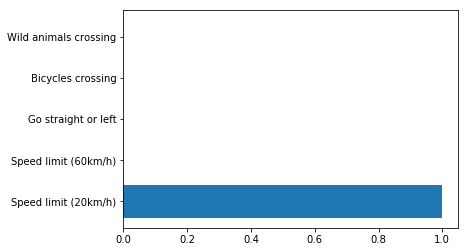

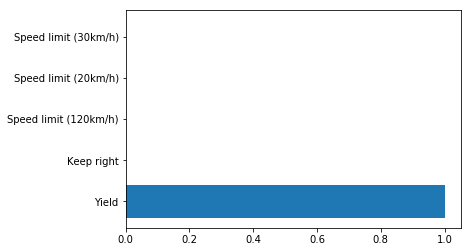

In [50]:
import matplotlib.pyplot as plt

for i in range(10):
    fig, ax = plt.subplots()
    ax.barh(np.arange(len(top_five.indices[i])), (top_five.values[i]))
    ax.set_yticks(np.arange(len(top_five.indices[i])))
    ax.set_yticklabels(labels=signs[top_five.indices[i]])

In [51]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./lenet


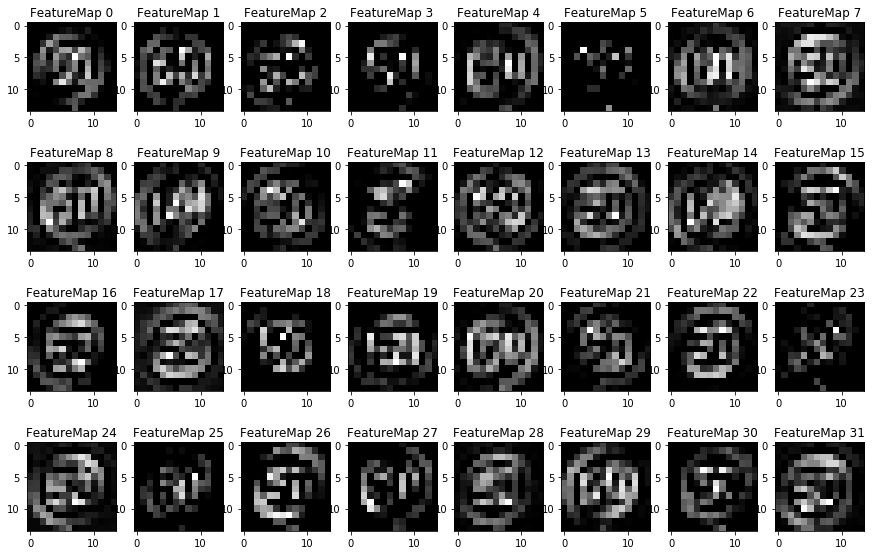

In [52]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(my_test_norm,l1)